# Pune House Price Prediction 📶💸💸🏚️🏗️🏠💸💸📶

## Exploratory Data Analysis

### EDA Purpose: 
- To explore the data for real estate's prices across the city of Pune. 
- Identify the relation between the price and the given features of the property.
- Find meaningful insights and visualize them.
- Identify best course of action for developing predictive models.

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
raw_data = pd.read_excel("../data/raw_data/Pune_Real_Estate_Data.xlsx")
raw_data.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...


In [3]:
orig_df = raw_data.copy()

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [6]:
print(f"Given data has {raw_data.shape[0]} records with {raw_data.shape[1]-1} columns assigned with unique Sr. No.")

Given data has 200 records with 17 columns assigned with unique Sr. No.


#### Find Unique values for all columns

In [7]:
for col in raw_data:
    unq = raw_data[col].unique()
    print("Column ", col, " has ", len(unq), " elements.", end="  ")
    if len(unq)> 100:
        print()
    else:
        print(unq)
    print("****************************************************************")

Column  Sr. No.  has  200  elements.  
****************************************************************
Column  Location  has  1  elements.  ['Pune, Maharashtra, India']
****************************************************************
Column  Sub-Area  has  39  elements.  ['Bavdhan' 'Mahalunge' 'Balewadi' 'Ravet' 'Baner' 'Kharadi'
 'Koregaon Park' 'Keshav Nagar' 'KirkatWadi Sinhagad Road' 'Akurdi'
 'pimpri pune' 'tathawade' 'hadapsar' 'kiwale' 'kayani nagar' 'pisoli'
 'manjri ' 'mahalunge' 'handewadi' 'koregoan' 'Mundhwa' 'NIBM'
 'BT Kawade RD' 'Undri ' 'Karvanagar ' 'magarpatta ' 'Hinjewadi ' 'ravet '
 'vimannagar' 'wadgaon sheri ' 'Susgaon ' 'mohammadwadi ' 'dhanori '
 'bavdhan budruk ' 'lonavala' 'baner' 'bavdhan' 'talegoan ' 'BANER']
****************************************************************
Column  Propert Type  has  33  elements.  ['1 BHK' '2 BHK' '3 BHK' '3 BHK Grand' '2BHK' '3BHK' '4BHK' '5BHK' '6BHK'
 '1BHK' 'shop' '2 bhk' '2bhk ' '3  bhk ' '3 bhk' '2bhk' '2.5 BHK' '3 BH

#### Cleaning needed based on 1st look:

1. Price in Lakhs and Price in Millions are the same columns with different unit and data type. We can drop one and keep the cleaned version of the other.
2. Column Location has a single value and can be eliminated for further experimentation.
3. Rest of the String columns needs cleaning and number of unique entries can be redueced by text preprocessing.
4. Yes/No type columns can be one-hot encoded for easier modeling.
5. Description column contains lengthy and random length texts. At a later stage it can be considered with WordEmbedding vectors, but for the time being can be dropped.
6. Township area has lots of null values that can be fixed.
7. Identify object columns that can be translated to numerical/continuous values.

In [8]:
# Drop the unnecessary columns
raw_data = raw_data.drop(["Sr. No.", "Location"], axis = 1)

In [9]:
# Rename columns for ease of access and better interpretability 
raw_data = raw_data.rename(columns={"Sub-Area": "Location", "Propert Type" : "Type", "Property Area in Sq. Ft." : "Area_sqft", "Price in lakhs" : "Price_Lakhs", "Price in Millions" : "Price_Mil",
                                    "Company Name" : "Developer", "TownShip Name/ Society Name" : "Name", "Total TownShip Area in Acres" : "Area_township", "ClubHouse" : "hasClubHouse",
                                    "School / University in Township ": "hasEduFacility", "Hospital in TownShip": "hasHospital", "Mall in TownShip" : "hasMall", "Park / Jogging track" : "hasParkOrJogTrack",
                                    "Swimming Pool" : "hasPool", "Gym" : "hasGym" })

In [12]:
# Check if all prices are valid
# Price mil = price lakh / 10
# creating a float column to see if the prices are correctly converted
raw_data["conv_price"] = raw_data["Price_Lakhs"].apply(lambda x:round(float(x)/10, 4) if str(x).replace(".", "", 1).isdigit() else np.NAN).astype("float64")
raw_data["Price_Mil"] = raw_data["Price_Mil"].apply(lambda x:round(float(x), 4) if str(x).replace(".", "", 1).isdigit() else np.NAN).astype("float64")
raw_data[raw_data["conv_price"] != raw_data["Price_Mil"]]

,Location,Type,Area_sqft,Price_Lakhs,Price_Mil,Developer,Name,Area_township,hasClubHouse,hasEduFacility,hasHospital,hasMall,hasParkOrJogTrack,hasPool,hasGym,Description,conv_price
41,Keshav Nagar,3BHK,1272 to 2138,Null,NaN,Mantra Properties,Mantra Insignia,NaN,Yes,No,No,No,Yes,Yes,Yes,"Mantra insignia is surrounded by nautre, the p...",NaN


<Axes: ylabel='Count'>

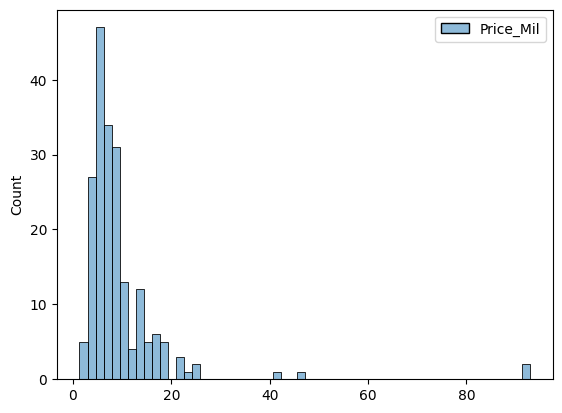

In [13]:
# Check the distribution of data and identify outliers
sns.histplot(raw_data[["Price_Mil"]])

#### The price_mil is our target variable and if there are less values to fix such as outliers, null price, etc. we can fix manually.

1. For null value: 
    - There can be multiple ways to identify the correct price of the property such as manual lookup, mean imputation, grouped mean by location, Area, and type, etc.
    - Here only 1 value was missing and thus, I manuaaly searched and filled the entry. For manual imputation in practice, one can scrape the data properly or rely on other services to fetch manual prices.
2. Outliers:
    - Definition of outlier can be subjective. For the given data the price for 3 BHK type was not as high as 90Mn, and the 2 records above can be seen as outliers.
    - For the records with 40Mn price, given the similar property features, the prices are correct and not outliers.
    - Both the above can be verified and manually corrected.
    - In practice, one can maintain the property groups on the basis of Location, Type, etc, and their price range to make sure the label isn't an outlier.

In [14]:
# Replaced Price value for the property with NaN Price_Mil with actual prices sourced from web, similar for outliers
# In ideal settings, this info is not given. For the model building, this price is ground truth and needs to be not null.
# Especially if one can find this groundtruth with easy ways, it should never be empty. 
raw_data["Price_Mil"] = raw_data["Price_Mil"].replace([np.NAN], 9.5)
raw_data["Price_Mil"] = raw_data["Price_Mil"].replace([92.300, 93.000], [9.230, 9.300])

In [15]:
raw_data.drop(["conv_price", "Price_Lakhs"], axis=1, inplace=True) # Not needed anymore

In [16]:
# Clean the object columns to extract numeric features
raw_data = raw_data.apply(lambda x:x.str.lower() if x.dtypes == "O" else x)
raw_data = raw_data.apply(lambda x:x.str.strip() if x.dtypes == "O" else x)

# Visualize different categorical data before cleaning

### Property Type and Price

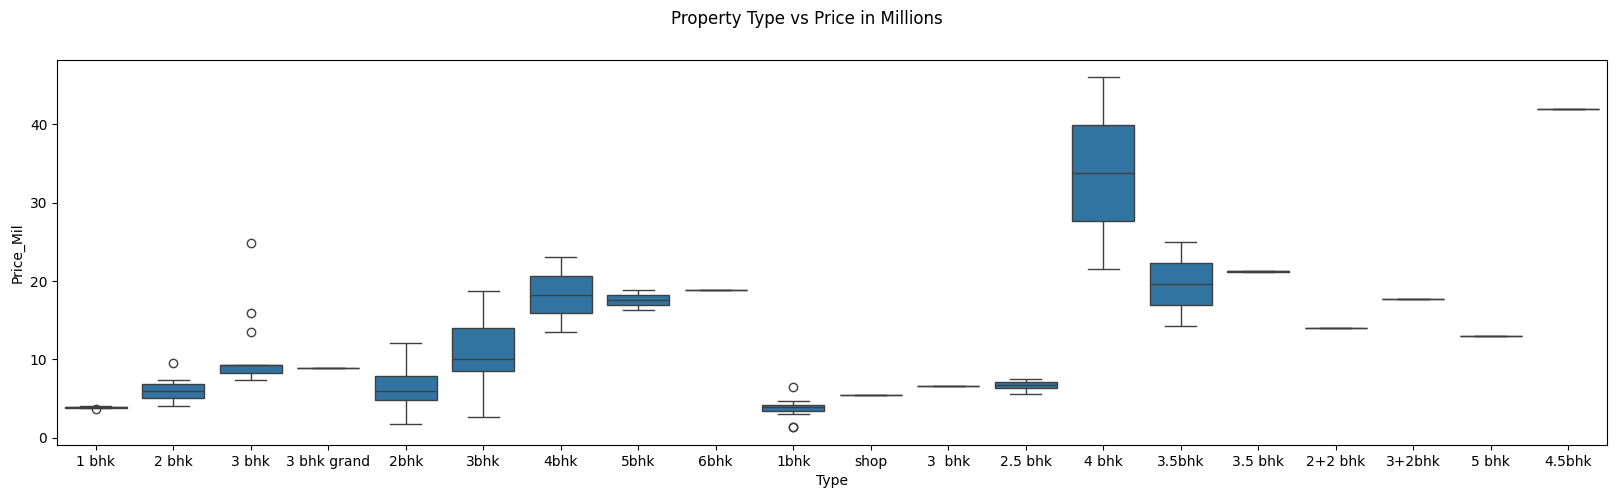

In [28]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle("Property Type vs Price in Millions")
ax.set_xlabel("Type")
sns.boxplot(x ='Type', y ='Price_Mil', data = raw_data,  ax=ax)
plt.show()

### Location and Price

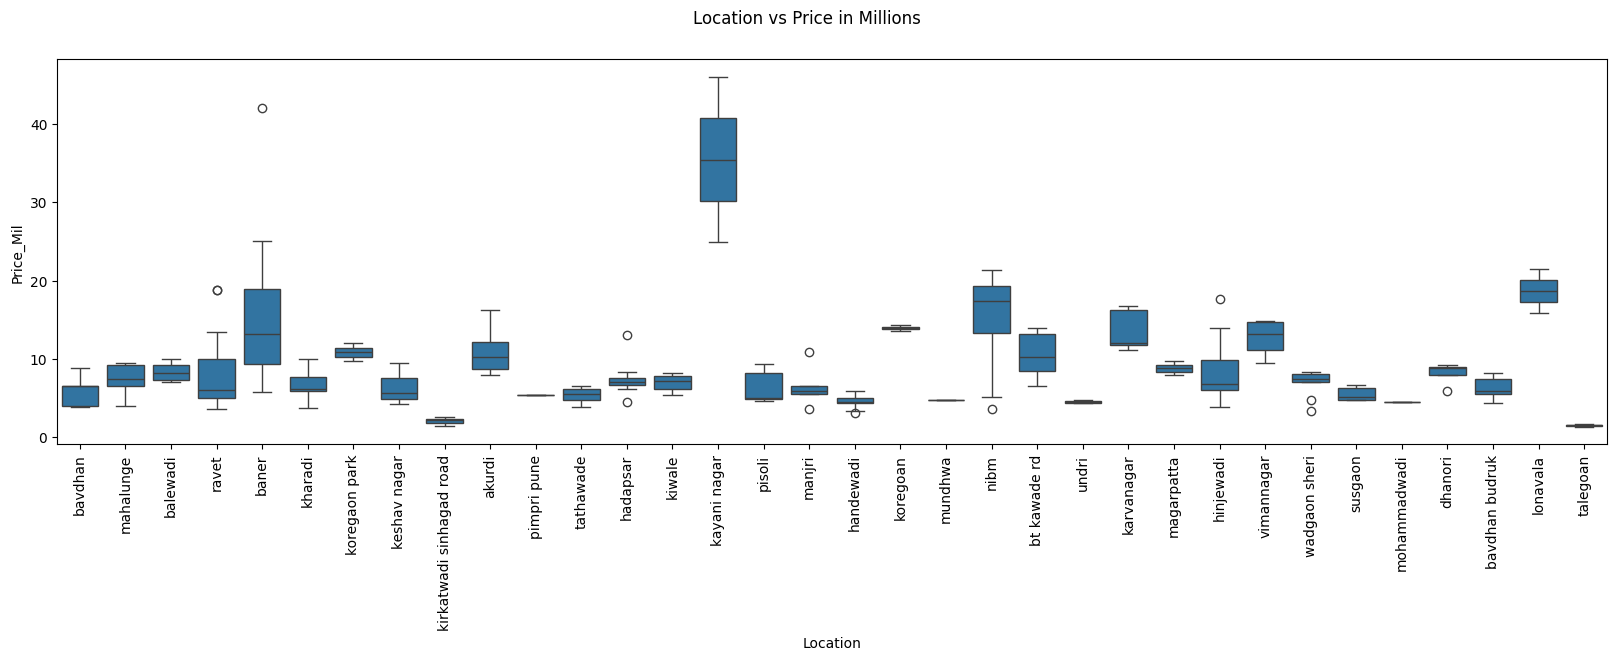

In [34]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle("Location vs Price in Millions")
ax.set_xlabel("Location")
plt.xticks(rotation=90)
sns.boxplot(x ='Location', y ='Price_Mil', data = raw_data,  ax=ax)
plt.show()

### Developer and Price

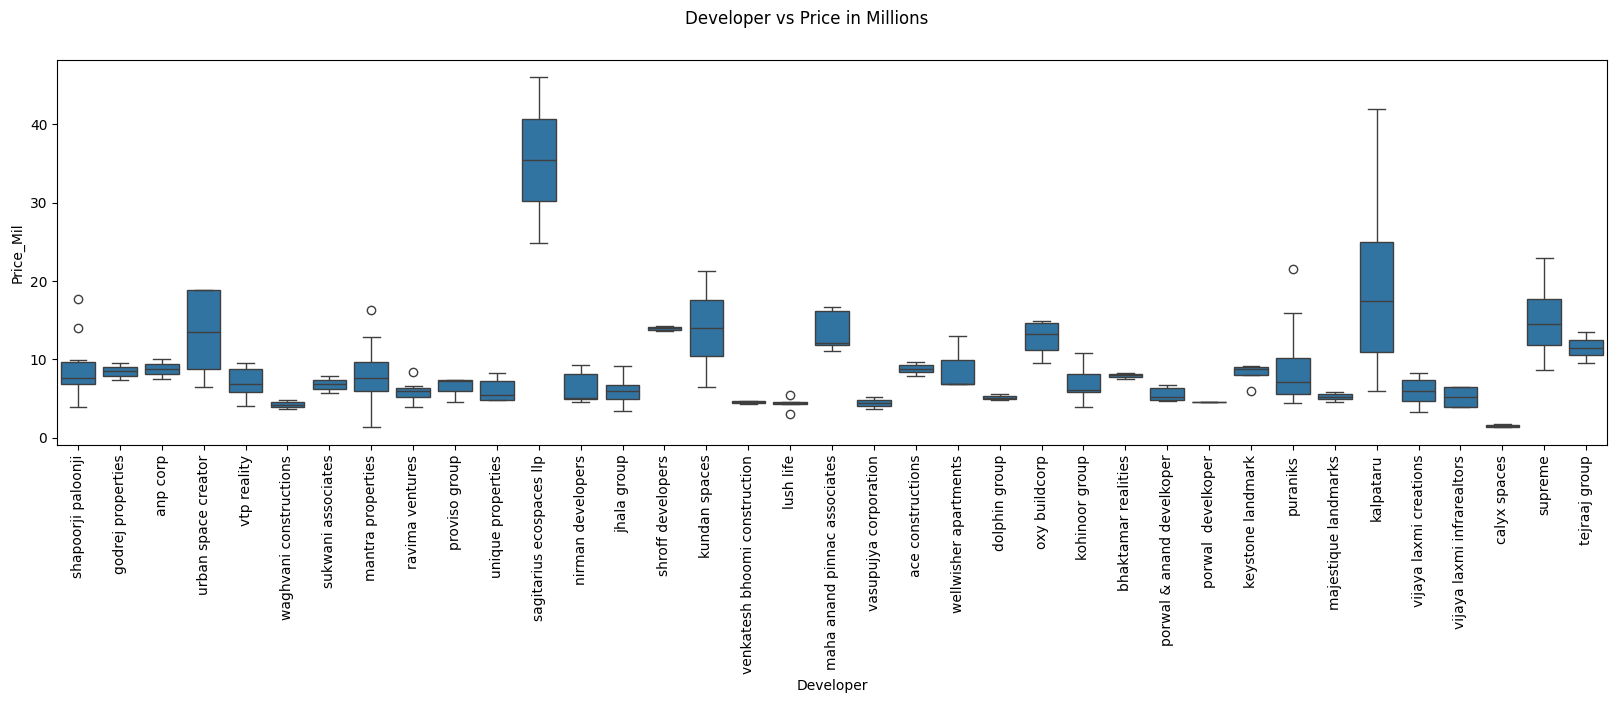

In [35]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle("Developer vs Price in Millions")
ax.set_xlabel("Developer")
plt.xticks(rotation=90)
sns.boxplot(x ='Developer', y ='Price_Mil', data = raw_data,  ax=ax)
plt.show()

## Many such plots can be plotted and left for future experimentation

#### Key Take-away:

1. Object categories have higher cardinality and needs a better encoding to be used for linear models
2. Data especially in strings, needs to be pre-processed to get proper categories.
3. In some features, such as Type, township area, we can introduce rank or some sort of order in the categories.
4. Locations can be ordered based on their price, trends, standard of living, etc.

## Final features will be engineered in step 02_feature_eng.ipynb notebook

#### __Thanks!!__